# Importing the libraries

In [1]:
import pandas_datareader as pdr
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import numpy

### code for retriving the data using api form tingoo

In [2]:
#importing the data
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,2005-01-03T00:00:00.000Z,63.29,65.11,62.60,64.780,12357000,0.955417,0.982892,0.945001,0.977910,691992691,0.0,1.0
1,1,2005-01-04T00:00:00.000Z,63.94,65.47,62.97,63.800,19585900,0.965229,0.988326,0.950587,0.963116,1096811496,0.0,1.0
2,2,2005-01-05T00:00:00.000Z,64.50,65.25,64.05,64.470,12150600,0.973683,0.985005,0.966890,0.973230,680434280,0.0,1.0
3,3,2005-01-06T00:00:00.000Z,64.55,64.91,63.33,64.685,12599200,0.974438,0.979872,0.956021,0.976476,705555905,0.0,1.0
4,4,2005-01-07T00:00:00.000Z,69.25,69.63,64.75,65.000,39775900,1.045389,1.051125,0.977457,0.981231,2227452627,0.0,1.0


In [4]:
df.tail()

,Unnamed: 0,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
4923,4923,2024-07-26T00:00:00.000Z,217.96,219.490,216.01,218.70,41601345,217.96,219.490,216.01,218.70,41601345,0.0,1.0
4924,4924,2024-07-29T00:00:00.000Z,218.24,219.300,215.75,216.96,36311778,218.24,219.300,215.75,216.96,36311778,0.0,1.0
4925,4925,2024-07-30T00:00:00.000Z,218.80,220.325,216.12,219.19,41643840,218.80,220.325,216.12,219.19,41643840,0.0,1.0
4926,4926,2024-07-31T00:00:00.000Z,222.08,223.820,220.63,221.44,50036262,222.08,223.820,220.63,221.44,50036262,0.0,1.0
4927,4927,2024-08-01T00:00:00.000Z,218.36,224.480,217.02,224.37,62500996,218.36,224.480,217.02,224.37,62500996,0.0,1.0


In [5]:
df.shape

(4928, 14)

In [6]:
df1=df.reset_index()['close']

In [7]:
df1.shape

(4928,)

In [8]:
df1

0        63.29
1        63.94
2        64.50
3        64.55
4        69.25
         ...  
4923    217.96
4924    218.24
4925    218.80
4926    222.08
4927    218.36
Name: close, Length: 4928, dtype: float64

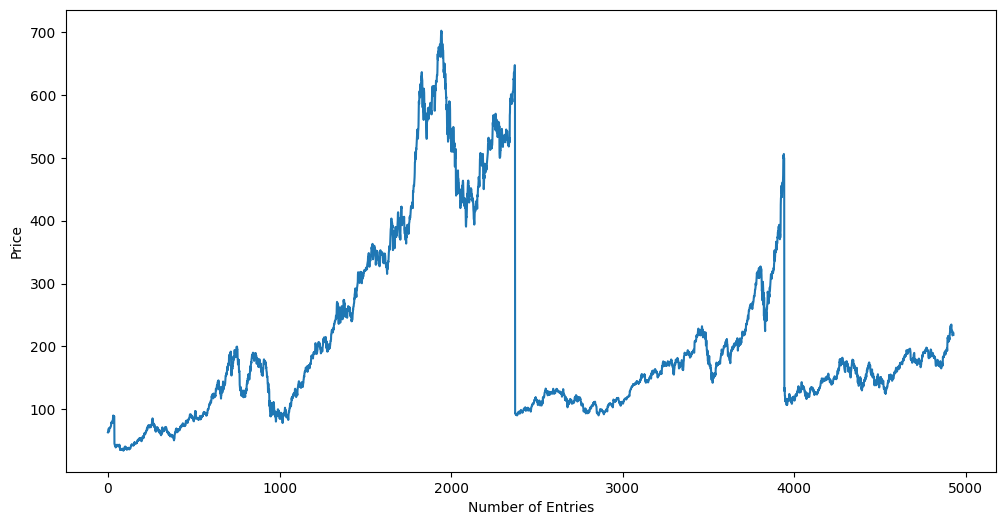

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df1)

# Add labels to the axes
plt.xlabel('Number of Entries')
plt.ylabel('Price')

# Show the plot
plt.show()


# scaling the data using minmax technique to make data points fair

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [11]:
df1.shape

(4928, 1)

# dividing the data into test and training set

In [12]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [13]:
training_size,test_size

(3203, 1725)

# creating the dataset in the form of x and y where x is the number of days which data is used to get information and y is the predicted data

In [14]:

def create_dataset(dataset,timestep=1):
    #convert an array of values into  dataset matrix
    dataX, dataY = [], []
    for i in range (len (dataset)-timestep-1):
        a=dataset[i:(i+timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep,0])
    return numpy.array(dataX),numpy.array(dataY)

In [15]:
#reshape into x=t,t+1...3 and y=t+4
timestep = 100
x_train,y_train=create_dataset(train_data,timestep)
x_test,y_test = create_dataset (test_data, timestep)


In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3102, 100)
(3102,)
(1624, 100)
(1624,)


In [17]:
#reshape input to be [samples ,timesteps, features] which is required for lstm i.e adding dimension to the data
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [18]:
x_train.shape

(3102, 100, 1)

In [19]:
print(x_train)

[[[0.04365466]
  [0.04462775]
  [0.04546611]
  ...
  [0.00842852]
  [0.0083387 ]
  [0.00845846]]

 [[0.04462775]
  [0.04546611]
  [0.04554097]
  ...
  [0.0083387 ]
  [0.00845846]
  [0.00989565]]

 [[0.04546611]
  [0.04554097]
  [0.05257721]
  ...
  [0.00845846]
  [0.00989565]
  [0.00962618]]

 ...

 [[0.16400437]
  [0.16416905]
  [0.16395946]
  ...
  [0.18791263]
  [0.18586164]
  [0.18825696]]

 [[0.16416905]
  [0.16395946]
  [0.16834588]
  ...
  [0.18586164]
  [0.18825696]
  [0.1864455 ]]

 [[0.16395946]
  [0.16834588]
  [0.16973816]
  ...
  [0.18825696]
  [0.1864455 ]
  [0.18653532]]]


# Create the stack LSTM model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [21]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [88]:
import tensorflow as tf

# Check if GPU is available
if not tf.test.gpu_device_name():
    raise SystemError('GPU device not found')

# Use GPU for the entire session
with tf.device('/GPU:0'):
    model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,batch_size=16,verbose=1)

Epoch 1/200
194/194 [==============================] - 5s 27ms/step - loss: 3.4121e-04 - val_loss: 2.4647e-04
Epoch 2/200
194/194 [==============================] - 5s 27ms/step - loss: 3.5017e-04 - val_loss: 2.4676e-04
Epoch 3/200
194/194 [==============================] - 5s 27ms/step - loss: 3.4686e-04 - val_loss: 2.2994e-04
Epoch 4/200
194/194 [==============================] - 5s 26ms/step - loss: 3.4504e-04 - val_loss: 6.3401e-04
Epoch 5/200
194/194 [==============================] - 5s 27ms/step - loss: 3.4988e-04 - val_loss: 2.4081e-04
Epoch 6/200
194/194 [==============================] - 6s 29ms/step - loss: 3.3207e-04 - val_loss: 2.2712e-04
Epoch 7/200
194/194 [==============================] - 6s 30ms/step - loss: 3.1659e-04 - val_loss: 3.0467e-04
Epoch 8/200
194/194 [==============================] - 5s 27ms/step - loss: 3.6212e-04 - val_loss: 2.8859e-04
Epoch 9/200
194/194 [==============================] - 5s 28ms/step - loss: 3.5957e-04 - val_loss: 3.1783e-04
Epoch 10/2

# do the prediction and check the performance metrics

In [89]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

51/51 [==============================] - 1s 11ms/step


In [90]:
##transform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [91]:
##calculate rmse performace metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

287.0849127535935

In [92]:
#test data rmse
math.sqrt(mean_squared_error(y_test,test_predict))

198.68650324068074

# plotting

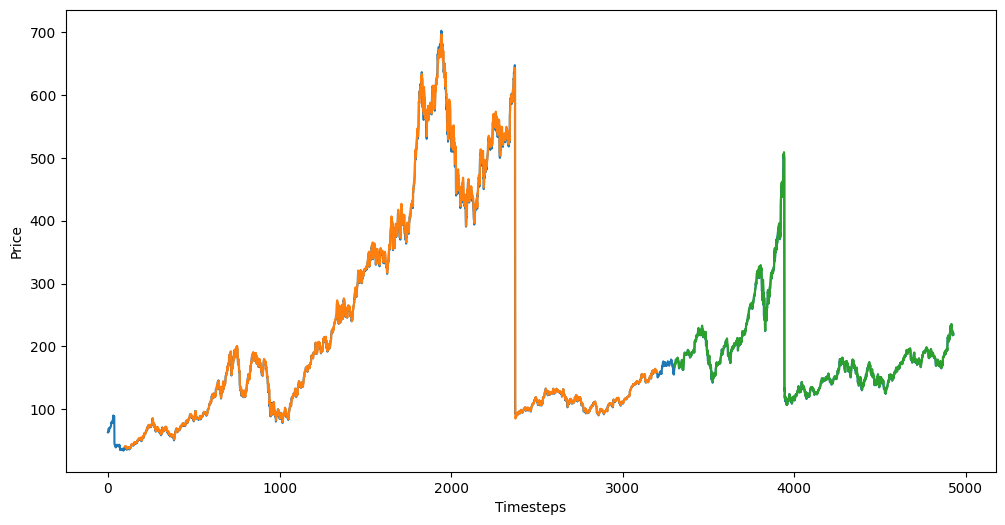

In [93]:
#shift train prediction for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] =train_predict
#shift test prediction for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:] =test_predict
#plot baseline and predictions
plt.figure(figsize=(12,6))
plt.xlabel('Timesteps')
plt.ylabel('Price')
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [94]:
len(test_data)

1725

In [95]:
x_input=test_data[1625:].reshape(1,-1)
x_input.shape

(1, 100)

In [96]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [97]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.27755693]
101
1 day input [0.20824289 0.20509903 0.20789856 0.20732967 0.20897645 0.21250954
 0.21638696 0.20545833 0.20682067 0.20467985 0.20297319 0.20836265
 0.20562301 0.20345225 0.20167073 0.20288336 0.20164079 0.20277857
 0.20108688 0.2029133  0.20008384 0.21095259 0.21321317 0.20743447
 0.20247915 0.20041319 0.198976   0.19592197 0.19717951 0.19876641
 0.20194021 0.20324266 0.20235939 0.20864709 0.20390137 0.20235939
 0.20794347 0.22343818 0.22093807 0.22197105 0.22248005 0.2252197
 0.22294414 0.22777969 0.22950132 0.23292962 0.23310927 0.23315418
 0.23490576 0.23686693 0.23469617 0.22867793 0.23331886 0.23333383
 0.23378295 0.23528003 0.23671722 0.23938201 0.23986107 0.24213662
 0.24005569 0.24366364 0.23801967 0.25902361 0.26788628 0.26963786
 0.26701798 0.27327575 0.26971271 0.2628112  0.25953261 0.26050571
 0.26189799 0.26815576 0.26942827 0.26421845 0.27339551 0.27866521
 0.28058146 0.28775244 0.28996811 0.2912556  0.29769301 0.28959384
 0.29404015 0.29981885 0.30044762 

In [114]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [115]:
import matplotlib.pyplot as plt


In [116]:
len(df1)

4928

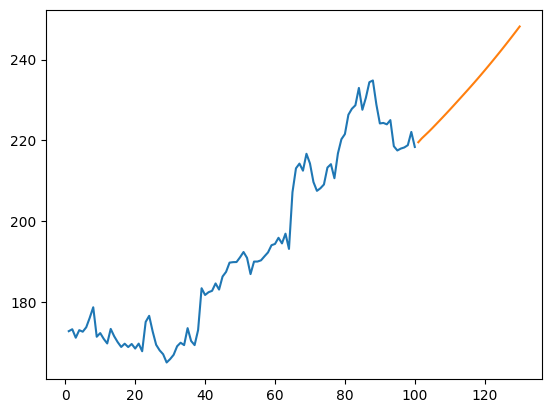

In [117]:
plt.plot(day_new,scaler.inverse_transform(df1[4828:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

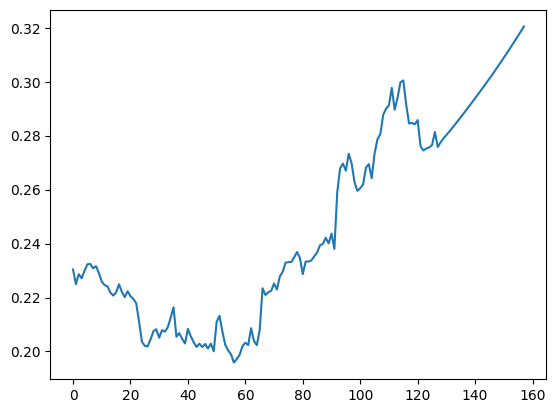

In [124]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[4800:])

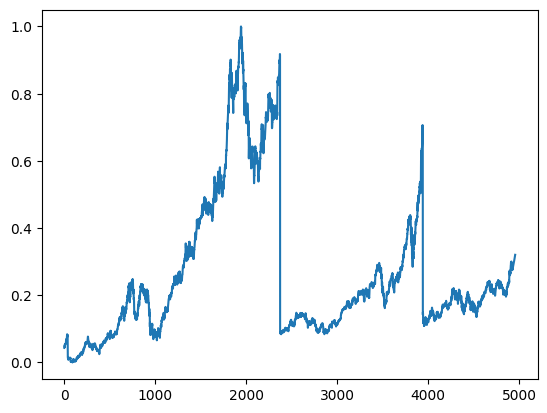

In [125]:
plt.plot(df3)


In [136]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df3_flat is a list of numeric values already prepared
df3_series = pd.Series(df3_flat)

# Calculate moving averages on df3_series
short_rolling = df3_series.rolling(window=20).mean()
long_rolling = df3_series.rolling(window=100).mean()

# Define the prediction start index
prediction_start_index = 4828  # Adjust this to match your actual prediction start index

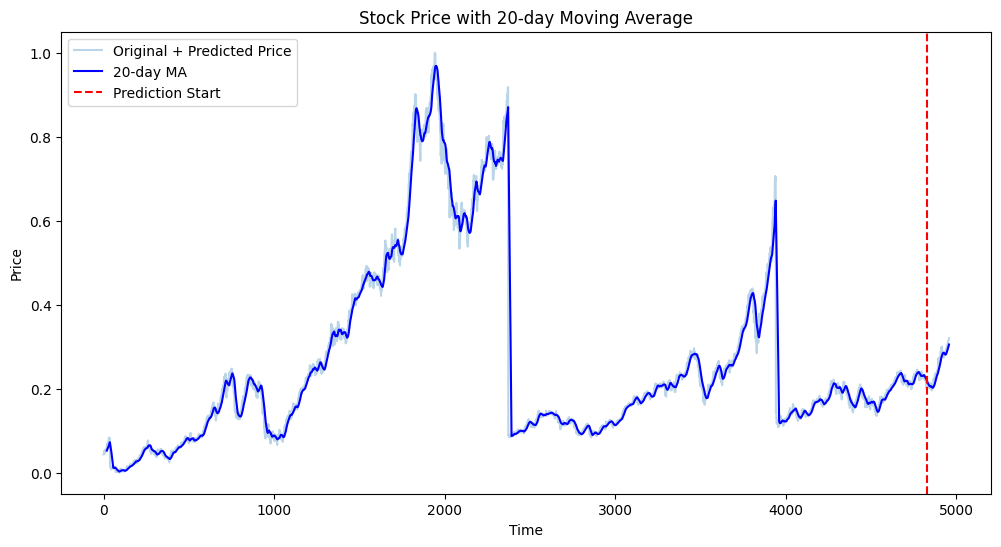

In [137]:
# Plot the 20-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df3_series, label='Original + Predicted Price', alpha=0.3)
plt.plot(short_rolling, label='20-day MA', color='blue')
plt.axvline(x=prediction_start_index, color='red', linestyle='--', label='Prediction Start')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price with 20-day Moving Average')
plt.legend()
plt.show()

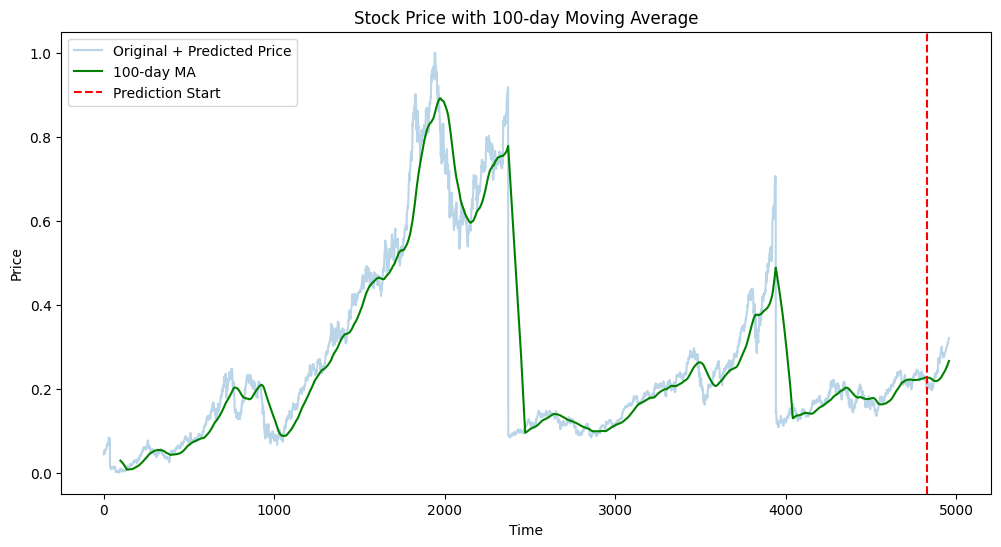

In [138]:
# Plot the 100-day moving average
plt.figure(figsize=(12, 6))
plt.plot(df3_series, label='Original + Predicted Price', alpha=0.3)
plt.plot(long_rolling, label='100-day MA', color='green')
plt.axvline(x=prediction_start_index, color='red', linestyle='--', label='Prediction Start')
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('Stock Price with 100-day Moving Average')
plt.legend()
plt.show()

In [145]:
import plotly.graph_objs as go
from plotly.offline import plot

fig = go.Figure(data=[go.Candlestick(x=df.index,
            open=df['open'],
            high=df['high'],
            low=df['low'],
            close=df['close'])])

fig.update_layout(title='Candlestick Chart',
                 xaxis_title='Time',
                 yaxis_title='Price')

plot(fig)


'temp-plot.html'